# 探索数据集

将训练集的数据分为训练集和验证集，其中训练集的图片数量为猫狗分别10000张，验证集的图片数量为猫狗分别2500。测试集的图片有12500张

In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from keras.preprocessing import *
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

def get_filepath_filename(path):
    '''
    获得训练集、验证集、测试集的路径和文件名
    '''
    file_paths = []
    file_names = []
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        file_paths.append(file_path)
        file_names.append(file)
    return file_paths, file_names

train_cat_file_paths, train_cat_file_names = get_filepath_filename('data/train/cat/')
train_dog_file_paths, train_dog_file_names = get_filepath_filename('data/train/dog/')
valid_cat_file_paths, valid_cat_file_names = get_filepath_filename('data/valid/cat/')
valid_dog_file_paths, valid_dog_file_names = get_filepath_filename('data/valid/dog/')
test_file_paths, test_file_names = get_filepath_filename('data/test/')
print('there are %d cat pictures for training' % len(train_cat_file_names))
print('there are %d dog pictures for training' % len(train_dog_file_names))
print('there are %d cat pictures for validation' % len(valid_cat_file_names))
print('there are %d dog pictures for validation' % len(valid_dog_file_names))
print('%d pictures for testing' % len(test_file_names))

train_label = np.array([0] * len(train_cat_file_names) + [1] * len(train_dog_file_names))
valid_label = np.array([0] * len(valid_cat_file_names) + [1] * len(valid_dog_file_names))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


there are 10000 cat pictures for training
there are 10000 dog pictures for training
there are 2500 cat pictures for validation
there are 2500 dog pictures for validation
12500 pictures for testing


# 创建图片生成器

通过ImageDataGenerator的方式创建图片生成器。

1.	rotation_range=40，随机旋转40度
2.	width_shift_range=0.2，随机水平移动占总宽度的20%
3.	height_shift_range=0.2，随机垂直移动占总宽度的20%
4.	rescale=1./255，将图像的像素值归一化到0-1的范围内
5.	shear_range=0.2，剪切强度为0.2
6.	zoom_range=0.2，随机缩放范围为0.2
7.	horizontal_flip=True，随机进行水平翻转
8.	fill_mode='nearest'，边界以外的点根据nearest的方式填充‘aaaaaaaa|abcd|dddddddd’

In [2]:
train_batch_size = 64
val_batch_size = 16

def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x


# 创建图片生成器
train_datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=.2,
                            preprocessing_function=preprocess_input,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# 训练集的图片生成器
train_gen = train_datagen.flow_from_directory(directory='data/train/',
                                              target_size=(299,299),
                                              batch_size=train_batch_size)

# 验证集的图片生成器
val_gen = train_datagen.flow_from_directory(directory='data/valid/',
                                              target_size=(299,299),
                                              batch_size=val_batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# 可视化数据增强后的图片

通过该方法，可以随机地对一张图片进行实时图片增强（每张图片仅执行随机的一种变换）

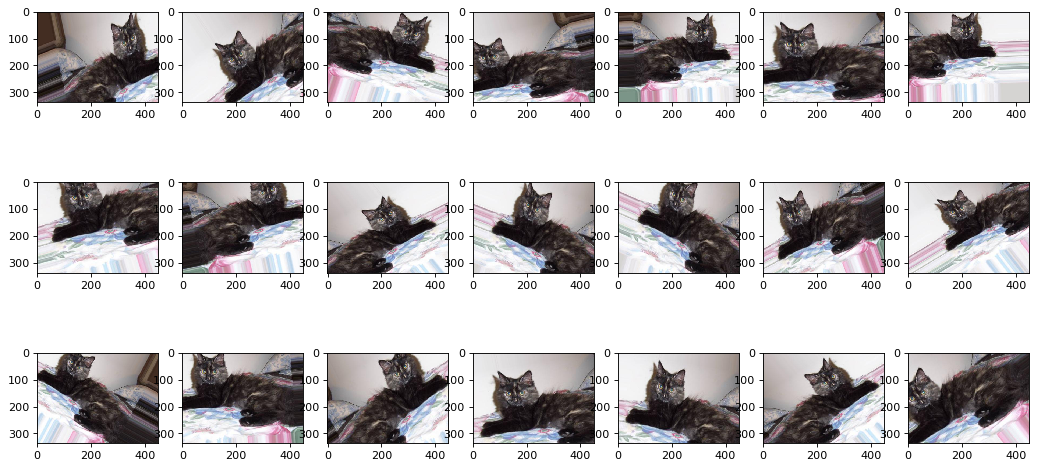

In [5]:
# 从训练集中加载一张图片
img = load_img('data/train/cat/cat.2600.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# 用该图片生成21张图像增强后的图片
i = 0
for batch in train_datagen.flow(x, batch_size=1, 
                                save_to_dir='preview', save_prefix = 'cat', save_format = 'jpeg'):
    i += 1
    if i > 20:
        break

# 将获得的图片保存到‘preview’的文件夹中，并显示
file_paths, file_names = get_filepath_filename('preview/')

plt.figure(figsize=(16,8),dpi=80)
x = np.arange(0,100,0.1)
y = x * 2
del_lisename = file_paths[1:]
for i in range(len(del_lisename)):
    img = load_img(del_lisename[i])
    img_array = img_to_array(img)

    plt.subplot(3,7,i+1)
    plt.imshow(img)
plt.show()        

# 创建模型

![image](fine_tune.png)

选择迁移学习的方法进行模型搭建，该项目主要试图兼顾准确率和模型大小，故选择Xception，大小为88M， TOP-1准确率最高，TOP-2准确率第二。

实现过程中保留模型的卷积层结构，去掉模型的全连接层和输出层。并且添加一个全局平均池化层来接收Xception的输出，再添加一个有1024个节点的全连接层和一个拥有2个节点的全连接层作为输出。


In [ ]:
from hyperas_my import data, create_model, run_hyperas

run_hyperas()

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from keras.preprocessing.image import ImageDataGenerator
except:
    pass

try:
    from keras.layers import GlobalAveragePooling2D, Dense, Dropout
except:
    pass

try:
    from keras.models import Model
except:
    pass

try:
    from keras.optimizers import Adagrad
except:
    pass

try:
    from keras.applications.xception import Xception, preprocess_input
except:
    pass

try:
    from keras.callbacks import EarlyStopping
except:
    pass

try:
    from keras import regularizers
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.di

/home/ec2-user/cat_vs_dog/temp_model.py:143: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Epoch 1/1
 - 120s - loss: 890.1569 - acc: 0.5312 - val_loss: 845.7836 - val_acc: 0.9006
Test accuracy: 0.8934
Epoch 1/1
 - 120s - loss: 1245.7249 - acc: 0.5312 - val_loss: 1183.6615 - val_acc: 0.7764
Test accuracy: 0.7832
Epoch 1/1
 - 121s - loss: 394.8878 - acc: 0.5000 - val_loss: 375.0644 - val_acc: 0.9246
Test accuracy: 0.9272
Epoch 1/1
 - 122s - loss: 662.2871 - acc: 0.4375 - val_loss: 629.1833 - val_acc: 0.9260
Test accuracy: 0.9232
Epoch 1/1
 - 125s - loss: 797.1768 - acc: 0.4688 - val_loss: 757.4741 - val_acc: 0.8738
Test accuracy: 0.8736
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Evalutation of best performing model:


In [4]:

from __future__ import print_function
from hyperas_my import data, create_model
from hyperopt import Trials, STATUS_OK, tpe
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

from hyperas import optim
from hyperas.distributions import choice, uniform

if __name__ == '__main__':
    best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=5,
                                          trials=Trials(),notebook_name='cat_vs_dog_v4')
    X_train, Y_train, X_test, Y_test = data()
    print("Evalutation of best performing model:")
    print(best_model.evaluate(X_test, Y_test))
    print("Best performing model chosen hyper-parameters:")
    print(best_run)

>>> Imports:
#coding=utf-8

try:
    from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
except:
    pass

try:
    from keras.preprocessing import *
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import os
except:
    pass

from __future__ import print_function

try:
    from hyperas_my import data, create_model
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from hyperas.distributions import uniform
except:
    pass

tr

SyntaxError: from __future__ imports must occur at the beginning of the file (temp_model.py, line 28)

In [23]:
from __future__ import print_function
from hyperas.distributions import uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adagrad
from keras.applications.xception import Xception, preprocess_input
from keras.callbacks import EarlyStopping
from keras import regularizers
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim

def path_to_tensor(img_path):
    # 用PIL加载RGB图像为PIL.Image.Image类型，将PIL.Image.Image类型转化为格式为(224, 224, 3)的3维张量
    img = image.load_img(img_path, target_size=(229, 229))
    # 将图片转化为数组
    x = image.img_to_array(img)
    # 将数组中的数字归一到-1-1之间
    x = (x / 255 - 0.5) * 2
    # 将3维张量转化为格式为(1, 224, 224, 3)的4维张量并返回
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    '''
    批量转化图片
    '''
    list_of_tensors = [path_to_tensor(img_path) for img_path in (img_paths)]
    return np.vstack(list_of_tensors)



train_data = 10000
val_data = 2500

def data():
    # 获取图片路径
    train_path = ['data/train/cat/cat.'+str(i+2500)+'.jpg' for i in range(train_data)]
    train_path.extend(['data/train/dog/dog.'+str(i+2500)+'.jpg' for i in range(train_data)])
    val_path = ['data/valid/cat/cat.'+str(i+1)+'.jpg' for i in range(val_data)]
    val_path.extend(['data/valid/dog/dog.'+str(i+1)+'.jpg' for i in range(val_data)])
    
    # 批量转换图片为模型需要的数组格式
    train_tensor = paths_to_tensor(train_path)
    val_tensor = paths_to_tensor(val_path)
#     print(val_tensor[1])
    return train_tensor, np.array([0]*train_data+[1]*train_data), val_tensor, np.array([0]*val_data+[1]*val_data)
data()
def model(x_train, y_train, x_test, y_test):
    # 去掉顶层输出层，加载预训练的权重
    base_model = Xception(include_top=False, weights='imagenet')

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2({{uniform(0, 1)}}))(x)
    x = Dropout({{uniform(0, 1)}})(x)
    predictions = Dense(2, activation='softmax')(x)
    model = Model(input=base_model.input, output=predictions)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.fit(X_train, Y_train,
              batch_size= 1,
              nb_epoch=1,
              show_accuracy=True,
              verbose=2,
              validation_data=(X_test, Y_test))
    
    score, acc = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}
if __name__ == '__main__':
    best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=5,
                                          trials=Trials())

    X_train, Y_train, X_test, Y_test = data()
    print("Evalutation of best performing model:")
    print(best_model.evaluate(X_test, Y_test))

>>> Imports:
#coding=utf-8

try:
    from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
except:
    pass

try:
    from keras.preprocessing import *
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import os
except:
    pass

try:
    from hyperas.distributions import uniform
except:
    pass

try:
    from keras.preprocessing.image import ImageDataGenerator
except:
    pass

try:
    from keras.layers import GlobalAveragePooling2D, Dense, Dropout
except:
    pass

try:
    from keras.models import Model
except:
    pass

try:
    from keras.optimizers import Adagrad
except:
    pass

try:
    from keras.applications.xception import Xception, preprocess_input
except:
    pass

try:
    from keras.callbacks import EarlyStopping
except:
    pass

try:
    from keras import regularizers
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:

IndentationError: unexpected indent (temp_model.py, line 159)

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adagrad
from keras.applications.xception import Xception, preprocess_input
from keras.callbacks import EarlyStopping
from keras import regularizers

# 去掉顶层输出层，加载预训练的权重
base_model = Xception(include_top=False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(.6)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(input=base_model.input, output=predictions)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


# 设置训练过程中的可视化参数

1. 设置训练模式，固定Xception的参数不变，只训练顶层的全连接层
2. 记录训练过程中的 `train loss` / `valid loss` / ` train acc ` / `valid acc`
3. 设置早期停止，当`valid loss`不再下降时，保存模型的参数
4. 编译模型时，选择优化器为adam，评价指标为accuracy。由于为分类问题，故选择优化交叉熵

In [10]:
import time
from keras.callbacks import Callback, ModelCheckpoint
from keras.callbacks import TensorBoard

def setup_to_transfer_learning(model,base_model):
    '''
    固定原来Xception的所有层的权重，并编译模型
    '''
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



# 重写callback类，使之能记录过程中的loss和accuracy
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

# 固定原来Xception的所有层的权重
setup_to_transfer_learning(model,base_model)

# 保存最优参数模型
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception.hdf5', 
                               verbose=1, save_best_only=True)

# 创建history实例
history = LossHistory()


# 训练模型

1. 由于设置了早期停止，故模型训练到20个epoch就结束了，此时验证准确率为97%
2. 训练共耗时5152秒

In [ ]:
def path_to_tensor(img_path):
    # 用PIL加载RGB图像为PIL.Image.Image类型，将PIL.Image.Image类型转化为格式为(224, 224, 3)的3维张量
    img = image.load_img(img_path, target_size=(229, 229))
    # 将图片转化为数组
    x = image.img_to_array(img)
    # 将数组中的数字归一到0-1之间
    x = (x / 255 -0.5) *2
    # 将3维张量转化为格式为(1, 224, 224, 3)的4维张量并返回
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    '''
    批量转化图片
    '''
    list_of_tensors = [path_to_tensor(img_path) for img_path in (img_paths)]
    return np.vstack(list_of_tensors)

# 获取图片路径
path_cat = ['data/train/cat'+str(i+2500)+'.jpg' for i in range(len(train_cat_file_names))]

train_tensor = paths_to_tensor

In [11]:

steps_per_epoch = 32
epochs = 9
# 记录初始时间
time0 = time.time()

history_tf = model.fit_generator(train_gen, 
                                 steps_per_epoch=steps_per_epoch, 
                                 epochs=epochs, 
                                 validation_data=val_gen,
                                 validation_steps=steps_per_epoch,
                                 callbacks=[EarlyStopping(patience=1), 
                                checkpointer,
                                history])

# 记录训练所花费的时间
print('training time is %d s' % (time.time()-time0))

Epoch 1/10
30/30 [==============================] - 187s 6s/step - loss: 6.0208 - acc: 0.8250 - val_loss: 3.3605 - val_acc: 0.9750

Epoch 00001: val_loss improved from inf to 3.36048, saving model to saved_models/weights.best.Xception.hdf5
Epoch 2/10
30/30 [==============================] - 52s 2s/step - loss: 2.1883 - acc: 0.9656 - val_loss: 1.3362 - val_acc: 0.9729

Epoch 00002: val_loss improved from 3.36048 to 1.33621, saving model to saved_models/weights.best.Xception.hdf5
Epoch 3/10
30/30 [==============================] - 52s 2s/step - loss: 0.9614 - acc: 0.9641 - val_loss: 0.6637 - val_acc: 0.9708

Epoch 00003: val_loss improved from 1.33621 to 0.66368, saving model to saved_models/weights.best.Xception.hdf5
Epoch 4/10
30/30 [==============================] - 51s 2s/step - loss: 0.5387 - acc: 0.9583 - val_loss: 0.3996 - val_acc: 0.9729

Epoch 00004: val_loss improved from 0.66368 to 0.39963, saving model to saved_models/weights.best.Xception.hdf5
Epoch 5/10
30/30 [=============

# 可视化训练过程中的损失和准确率
1. 可视化训练过程的训练和验证损失，如图12可以看出，在5个epoch之前，训练损失和验证随时都快速降低，5个epoch之后，两个损失都收敛于0.3左右
2. 可视化训练和验证的准确率，如图13可以看出训练集的准确率在一开始就达到80%以上，这是因为使用了迁移学习的原因，Xception已经进行了预训练，所以可以很快学习到猫狗的分类。验证集的准确率在95%上下不断波动，也在可接受范围内。
（更正：下面两个图中蓝色代表train loss和train acc，红色代表val loss和val acc）

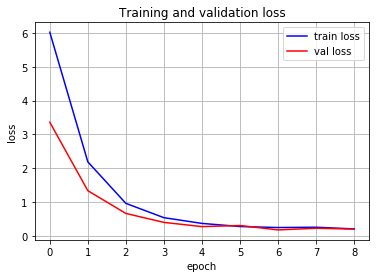

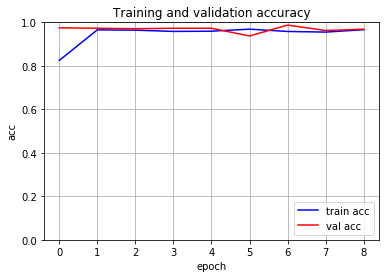

In [21]:
def plot_loss(history):
    '''
    绘制训练过程的loss曲线
    '''
    iters = range(len(history.losses['epoch']))
    plt.figure()
    plt.plot(iters, history.losses['epoch'], 'b', label='train loss')
    plt.plot(iters, history.val_loss['epoch'], 'r', label='val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.title('Training and validation loss')
    plt.grid(True)
    plt.show()

def plot_acc(history):
    '''
    绘制训练过程中的accuracy曲线
    '''
    iters = range(len(history.losses['epoch']))
    plt.figure()
    plt.plot(iters, history.accuracy['epoch'], 'b', label='train acc')
    plt.plot(iters, history.val_acc['epoch'], 'r', label='val acc')
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.ylim((0, 1))
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')
    plt.grid(True)
    plt.show()

plot_loss(history)
plot_acc(history)

# 预测测试集
预测测试集的12500张图片的结果，总共耗时3959秒

In [12]:
from keras.preprocessing import image                  
from tqdm import tqdm
import os
import pandas as pd

model.load_weights('saved_models/weights.best.Xception.hdf5')

def path_to_tensor(img_path):
    # 用PIL加载RGB图像为PIL.Image.Image类型，将PIL.Image.Image类型转化为格式为(224, 224, 3)的3维张量
    img = image.load_img(img_path, target_size=(229, 229))
    # 将图片转化为数组
    x = image.img_to_array(img)
    # 将数组中的数字归一到0-1之间
    x = (x / 255 -0.5) *2.
    # 将3维张量转化为格式为(1, 224, 224, 3)的4维张量并返回
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    '''
    批量转化图片
    '''
    list_of_tensors = [path_to_tensor(img_path) for img_path in (img_paths)]
    return np.vstack(list_of_tensors)

# 获取图片路径
path = ['data/test/'+str(i+1)+'.jpg' for i in range(len(test_file_names))]

# 批量转换图片为模型需要的数组格式
test_tensor = paths_to_tensor(path)

# 进行预测
pred_test = model.predict(test_tensor, verbose=1)

12500/12500 [==============================] - 168s 13ms/step


# 保存提交结果
kaggle平台要求提供原始的预测概率数据，故完整保存了一张图片分别为猫和狗的概率

In [18]:
# 将结果保留4位小数
def round_data(data):
    return round(data, 4)

# 结果转换为DataFrame的格式，保存在result/Result.csv中
test_result = pd.DataFrame(pred_test.clip(min=0.005, max=0.995), index=range(1, len(pred_test)+1), columns=['id', 'label'])
os.getcwd()
test_result_round = test_result.apply(round_data)
test_result_round.to_csv('result/submission.csv')

# 计算log loss
kaggle通过计算log loss的得分进行排名，![png](log_losss.png)

根据项目需要，得分至少达到**0.06127**，该模型的得分为**0.02910**，满足要求

In [2]:
# 读取预测结果的数据
test_result_round = pd.read_csv('result/Result.csv')
evaluate_data = test_result_round.loc[:, '0':'1'].values

# 计算log loss的值
def log_loss(evaluate_data):
    result = 0
    for i in range(evaluate_data.shape[0]):
        if evaluate_data[i][1] > 0.5:
            is_dog = 1
            result += np.log(evaluate_data[i][1])
        elif evaluate_data[i][1] < 0.5:
            is_dog = 0
            result += np.log(evaluate_data[i][0])
    return result / evaluate_data.shape[0] * (-1)

print(log_loss(evaluate_data))

0.0291003102812


# 可视化结果

通过可视化，可以看到预测的结果正确

IndexError: index 0 is out of bounds for axis 0 with size 0

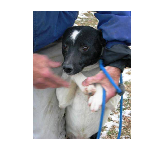

In [20]:
test_result_round = pd.read_csv('result/submission.csv')
evaluate_data = test_result_round.loc[:, '0':'1'].values

for i in range(evaluate_data.shape[0]):
    for j in range(evaluate_data.shape[1]):
        evaluate_data[i][j] = round(evaluate_data[i][j], 4)

def plot_result(num, n_rows, n_columns, test_result_round):
    '''
    可视化预测结果
    '''
    path = ['data/test/' + str(i+1) + '.jpg' for i in range(num)]
    plt.figure(figsize=(8, 8))
    for i in range(num):
        img = load_img(path[i])
        img_array = img_to_array(img)
        plt.subplot(n_rows, n_columns, i+1)
        plt.imshow(img)
        plt.axis('off')
        if test_result_round[i][0] > 0.5:
            name = 'cat'
            title = name + '  ' + str(test_result_round[i][0]*100) + '%'
        else:
            name = 'dog'
            title = name + '  ' + str(test_result_round[i][1]*100) + '%'
        plt.title(title)
    plt.show()
plot_result(9, 3, 3, evaluate_data)